In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import auc, log_loss, roc_curve, confusion_matrix, precision_recall_curve
import missingno

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, average_precision_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.cat_boost import CatBoostEncoder
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
import category_encoders as ce
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

from sklearn import base
from sklearn.model_selection import KFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as pyplot
from sklearn.model_selection import GridSearchCV


In [ ]:
df = pd.read_csv('dados.csv')

In [ ]:
df.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,fecha,monto,score,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


# Considerações iniciais

O objetivo da análise a seguir é criar um modelo de fraude a partir dos dados fornecidos. Por se tratar de um modelo de fraude, utilizaremos algoritmos de apredizado supervisionado e classificação.
Ao longo da análise foram feitas considerações e assumidas premissas que serão discutidas individualmente em cada passo.

# EDA

In [ ]:
df.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,fecha,monto,score,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


In [ ]:
df.describe()

,a,b,c,d,e,f,h,k,l,m,n,monto,score,fraude
count,150000.000000,137016.000000,1.370160e+05,149635.000000,150000.000000,149989.000000,150000.000000,150000.000000,149989.000000,149635.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3.705407,0.728115,2.604451e+05,21.677669,0.220641,51.169352,14.193513,0.497532,2305.409403,299.969579,0.902353,43.523134,48.066240,0.050000
std,0.753206,0.132943,8.464361e+05,20.062146,2.434995,709.472904,14.161216,0.288348,1712.379601,321.075806,0.296837,91.557888,28.995122,0.217946
min,1.000000,0.000000,1.600000e-01,0.000000,0.000000,-5.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
25%,4.000000,0.678400,9.679915e+03,2.000000,0.000000,1.000000,3.000000,0.246819,910.000000,42.000000,1.000000,9.380000,23.000000,0.000000
50%,4.000000,0.755500,4.371165e+04,14.000000,0.104875,8.000000,9.000000,0.495990,1937.000000,193.000000,1.000000,20.610000,48.000000,0.000000
75%,4.000000,0.806500,1.454436e+05,50.000000,0.282938,33.000000,21.000000,0.746508,3445.000000,459.000000,1.000000,40.692500,73.000000,0.000000
max,4.000000,1.000000,1.387874e+07,50.000000,833.333333,145274.000000,58.000000,0.999995,7544.000000,2225.000000,1.000000,3696.350000,100.000000,1.000000


In [ ]:
df.sort_values(by=["fecha"])

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,fecha,monto,score,fraude
71610,4,0.7388,6314.50,14.0,0.139279,24.0,BR,7,Emagrecedor Natural E Eficiente Sem Sacrifícios,cat_381751d,0.937548,2361.0,442.0,1,NaN,Y,2020-03-08 00:02:15,22.18,25,0
27762,4,0.7548,21171.09,20.0,0.514815,7.0,BR,2,Lona Plastica Encerado 3x2 Azul Multiuso Imper...,cat_a024847,0.791998,2324.0,73.0,1,NaN,N,2020-03-08 00:04:25,6.00,7,0
37102,4,0.9026,4012.83,50.0,0.274167,1.0,BR,3,15 Boxer Atacado Oferta Embaladas Individualmente,cat_1d61c62,0.688592,235.0,232.0,1,N,Y,2020-03-08 00:08:23,26.67,91,1
120427,4,0.8285,99612.95,1.0,0.000000,4.0,BR,28,Maleta De Maquiagem Completa Profissional Ruby...,cat_01a1725,0.654161,658.0,0.0,1,N,N,2020-03-08 00:08:39,40.01,91,1
5888,2,0.5992,53526.36,2.0,0.000000,264.0,AR,34,Lumilagro Repuesto Termo Compacto 1 Lt - El Or...,cat_f1e7464,0.532994,2400.0,10.0,1,NaN,N,2020-03-08 00:09:01,6.25,93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54495,4,0.6670,75908.06,11.0,0.498747,16.0,BR,21,Cortador Alicate Duplo Cortar Chip Celular Mic...,cat_141c8e9,0.353681,1385.0,385.0,1,NaN,Y,2020-04-21 23:57:24,7.70,50,1
37163,4,0.8055,5108.96,21.0,0.000000,5.0,BR,48,Pisca Mini Bullet Alien 2 Unid Bobber Cafe Har...,cat_773a095,0.851495,4381.0,54.0,1,NaN,N,2020-04-21 23:57:43,18.91,21,0
71574,4,0.6135,4775.60,50.0,0.196667,2.0,BR,8,Monovin A 20ml Original Vitamina A Crescer Cabelo,cat_be0af8e,0.933384,1044.0,290.0,1,Y,Y,2020-04-21 23:58:10,5.79,52,0
51281,4,0.7907,14381.81,20.0,0.000000,9.0,BR,12,Meia Lã Infantil Bebê Super Quente Modelo Boti...,cat_acfec5e,0.236529,4339.0,792.0,1,NaN,Y,2020-04-21 23:59:49,24.60,52,0


Como a coluna "n" assume um valor booleano, consideraremos que é uma feature categórica. Poderiamos fazer a mesma consideração para a coluna "a", porém como assume 4 valores e esses valores podem representar de fato uma hierarquia numérica, manteremos a coluna nas features numéricas.

A coluna "fecha" representa uma data, e, por não fazermos um modelo tipo time series, não faz sentido colocá-la como feature. Essa coluna, entretanto, poderia ser usada para verificar a performance do modelo em relação ao tempo, uma vez que os fraudadores desenvolvem técnicas diferentes ao longo do tempo, além de poder haver shift de população - o que pode degradar nosso modelo com o tempo. Contudo, no subconjunto fornecido temos apenas 2 meses de dados e, por isso, não será possível verificar tais comportamentos em tão pouco tempo. Dessa forma, a coluna será removida do modelo.


In [ ]:
numericas_all = ["a", "b", "c", "d", "e","f", "h", "k", "l", "m", "monto"]
categoricas_all = ["g", "i", "j", "n", "o","p"]
all_features = ["a", "b", "c", "d", "e","f", "h", "k", "l", "m", "monto", "g", "i", "j", "n", "o","p"]

## Missing values

Considerações

Não existe nenhum outro valor que poderia ser considerado nulo na base - Ex: muitas vezes o valor 999 pode representar um valor nulo. Como não foi descrito nem encontrado valores usualmente conhecidos como nulo, essa consideração será feita

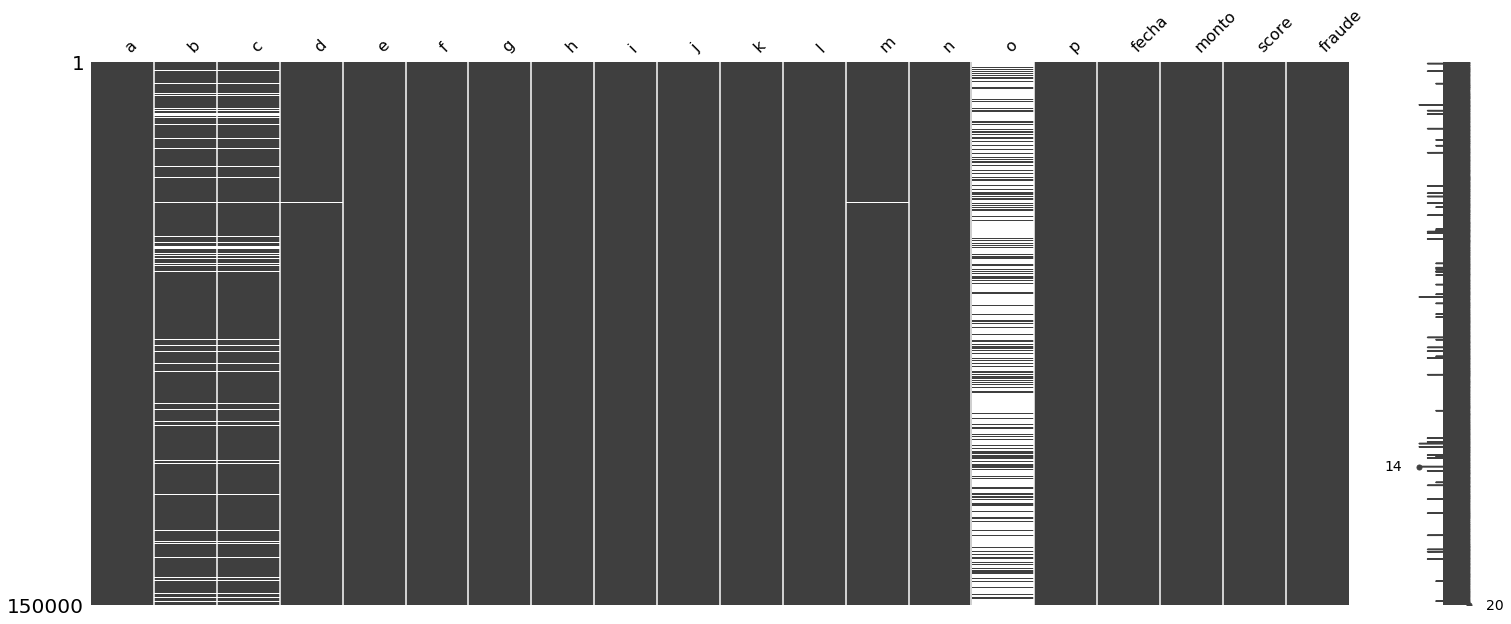

In [ ]:
missingno.matrix(df)

In [ ]:
#percentual de nulos nas colunas
df.isna().sum()/df.fraude.count()*100

a          0.000000
b          8.656000
c          8.656000
d          0.243333
e          0.000000
f          0.007333
g          0.129333
h          0.000000
i          0.000000
j          0.000000
k          0.000000
l          0.007333
m          0.243333
n          0.000000
o         72.571333
p          0.000000
fecha      0.000000
monto      0.000000
score      0.000000
fraude     0.000000
dtype: float64

É importante ressaltar em alguns casos, os nulos podem representar algo. Por exemplo, a não entrega de um documento pode ser preenchido como NaN no dataset, porém essa falta de entrega pode ajudar a detectar possiveis fraudadores. Nesses casos, é interessante criar uma nova feature (coluna) booleana indicando se o documento foi ou não entregue (1: entregue, 0: preenchimento nulo).

Como não foi dito sobre possíveis relações de nulos com regras de negócio, assumiremos que esse risco não existe. 

Como a coluna "o" é composta majoritariamente por nulos, essa coluna será removida. Para o restante que contém nulos, iremos usar técnicas de preenchimento de nulos.



## Cardinalidade

In [ ]:
#função para cáculo da cardinalidade
cardinalidades = [] 

for item in categoricas_all:
    nome_var = item
    cardinalidade = df[item].nunique() 
    cardinalidades.append(cardinalidade) 
  
df_cardinalidades = pd.DataFrame({"Variavel": categoricas_all,
                                  "Cardinalidade": cardinalidades,}) 

In [ ]:
#cardinalidade das features categoricas
df_cardinalidades

,Variavel,Cardinalidade
0,g,51
1,i,127804
2,j,8324
3,n,2
4,o,2
5,p,2


,g,counter,fraude,percent_cumsum_fraude
0,BR,111628,6162,82.160000
1,AR,31964,1179,97.880000
2,UY,2967,29,98.266667
3,US,2273,70,99.200000
4,SE,358,15,99.400000
5,MX,236,3,99.440000
6,RU,73,6,99.520000
7,ES,69,5,99.586667
8,CO,64,1,99.600000
9,GB,43,0,99.600000


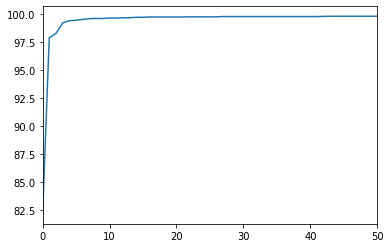

In [ ]:
#deep dive na coluna g
compra_por_pais = df.g.value_counts().reset_index().rename(columns = {"index": "g", "g":"counter"})

fraude_por_pais = df.groupby(['g']).fraude.sum().reset_index()
df_pais_fraude = pd.merge(compra_por_pais, fraude_por_pais, on = ['g'], how = "left")

df_pais_fraude['percent_cumsum_fraude'] = df_pais_fraude['fraude'].cumsum()/df.fraude.sum()*100


display(df_pais_fraude[0:10]) #82% das fraudes concentradas no BR - ou seja, 82% das compras concentradas em 2% dos países
df_pais_fraude['percent_cumsum_fraude'].plot();

,j,counter,fraude,percent_cumsum_fraude
0,cat_43b9c10,2331,380,5.066667
1,cat_d69bed9,1799,54,5.786667
2,cat_604df77,1784,71,6.733333
3,cat_6c4cfdc,1449,74,7.720000
4,cat_4249bd8,1191,98,9.026667
...,...,...,...,...
995,cat_95bf71c,29,1,80.013333
996,cat_031b233,29,0,80.013333
997,cat_c4b1e74,29,1,80.026667
998,cat_eb027de,29,0,80.026667


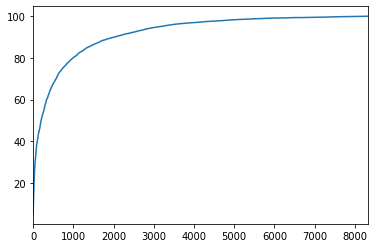

In [ ]:
#deep dive na coluna j
item_por_categoria = df.j.value_counts().reset_index().rename(columns = {"index": "j", "j":"counter"})
fraude_por_categoria = df.groupby(['j']).fraude.sum().reset_index()
df_item_fraude = pd.merge(item_por_categoria, fraude_por_categoria, on = ['j'], how = "left")

df_item_fraude['percent_cumsum_fraude'] = df_item_fraude['fraude'].cumsum()/df.fraude.sum()*100

display(df_item_fraude[0:1000]) #80% das fraudes concentradas em 12% das categorias
df_item_fraude['percent_cumsum_fraude'].plot();


A alta cardinalidade pode ser muito prejudicial para o modelo pois existem grandes chances dessas determinadas features não discriminarem padrões, e, portanto, não agregar nada ao modelo. Além disso, a alta cardinalidade pode deixar os dados muito esparsos, afetando a performance do modelo

**Coluna "g"**:
Representa o país. Esse dado pode ser muito útil em modelos de fraude, e, portanto, podemos usar estratégias para driblar a alta cardinalidade. Como 82% das fraudes estão concentradas no Brasil, a estratégia será dividir a coluna em compras nacionais (BR) e internacionais (outros países).

**Coluna "i"**:
Representa o produto que está sendo comprado. Essa coluna pode ser bastante interessante para um modelo de fraude pois determinados produtos podem ser um maior alvo dos fraudadores do que outros. Uma possível solução para esse problema o uso subcategorias (ex: produtos de beleza, eletrônicos, etc). Essa informação não está disponível na coluna j.

**Coluna "j"**: 
Representa a categoria do produto sendo comprado. Essa coluna tem alta cardinalidade em comparação ao tamanho do dataset, fazendo com que, em muitos casos, haja apenas 1 produto por categoria. Conforme visto na tabela acima, 80% das fraudes (coluna percent_cumsum_fraude) estão alocadas em 12% das categorias (1000 categorias). Dessa forma, na tentativa de diminuir a cardinalidade, materemos as 1000 principais categorias. As outras serão agrupadas em uma categoria chamada "outras".
Uma ressalva importante é que, caso esse seja de fato o padrão de divisões de categorias, poderiamos agrupar essas subcategorias em categorias maiores, diminuindo assim a cardinalidade (ex: vestuário, produtos eletrônicos, etc). Essa informação não está disponível no dataset, mas caso haja, poderia ser extraída de outras bases. Caso não haja em outras bases, poderia ser criado um widget para que o vendedor pudesse classificar o produto de forma mais macro e, se ainda assim isso não fosse possível, poderíamos criar um modelo de NLP e classificação que fosse capaz de entender as possíveis classes macro do produto, ou ainda um modelo não supervisionado de clusterização com informações que discriminem o produto (preço, perfil de cliente que efetua compra, etc). Porém, devido a proposta do desafio e ao tempo disponível, pelo fato de não termos construído uma base de treino para a construção desse NLP e nem termos informações suficientes sobre o produto, vamos seguir com o agrupamento em uma coluna chamada "outras"

## Colunas numéricas

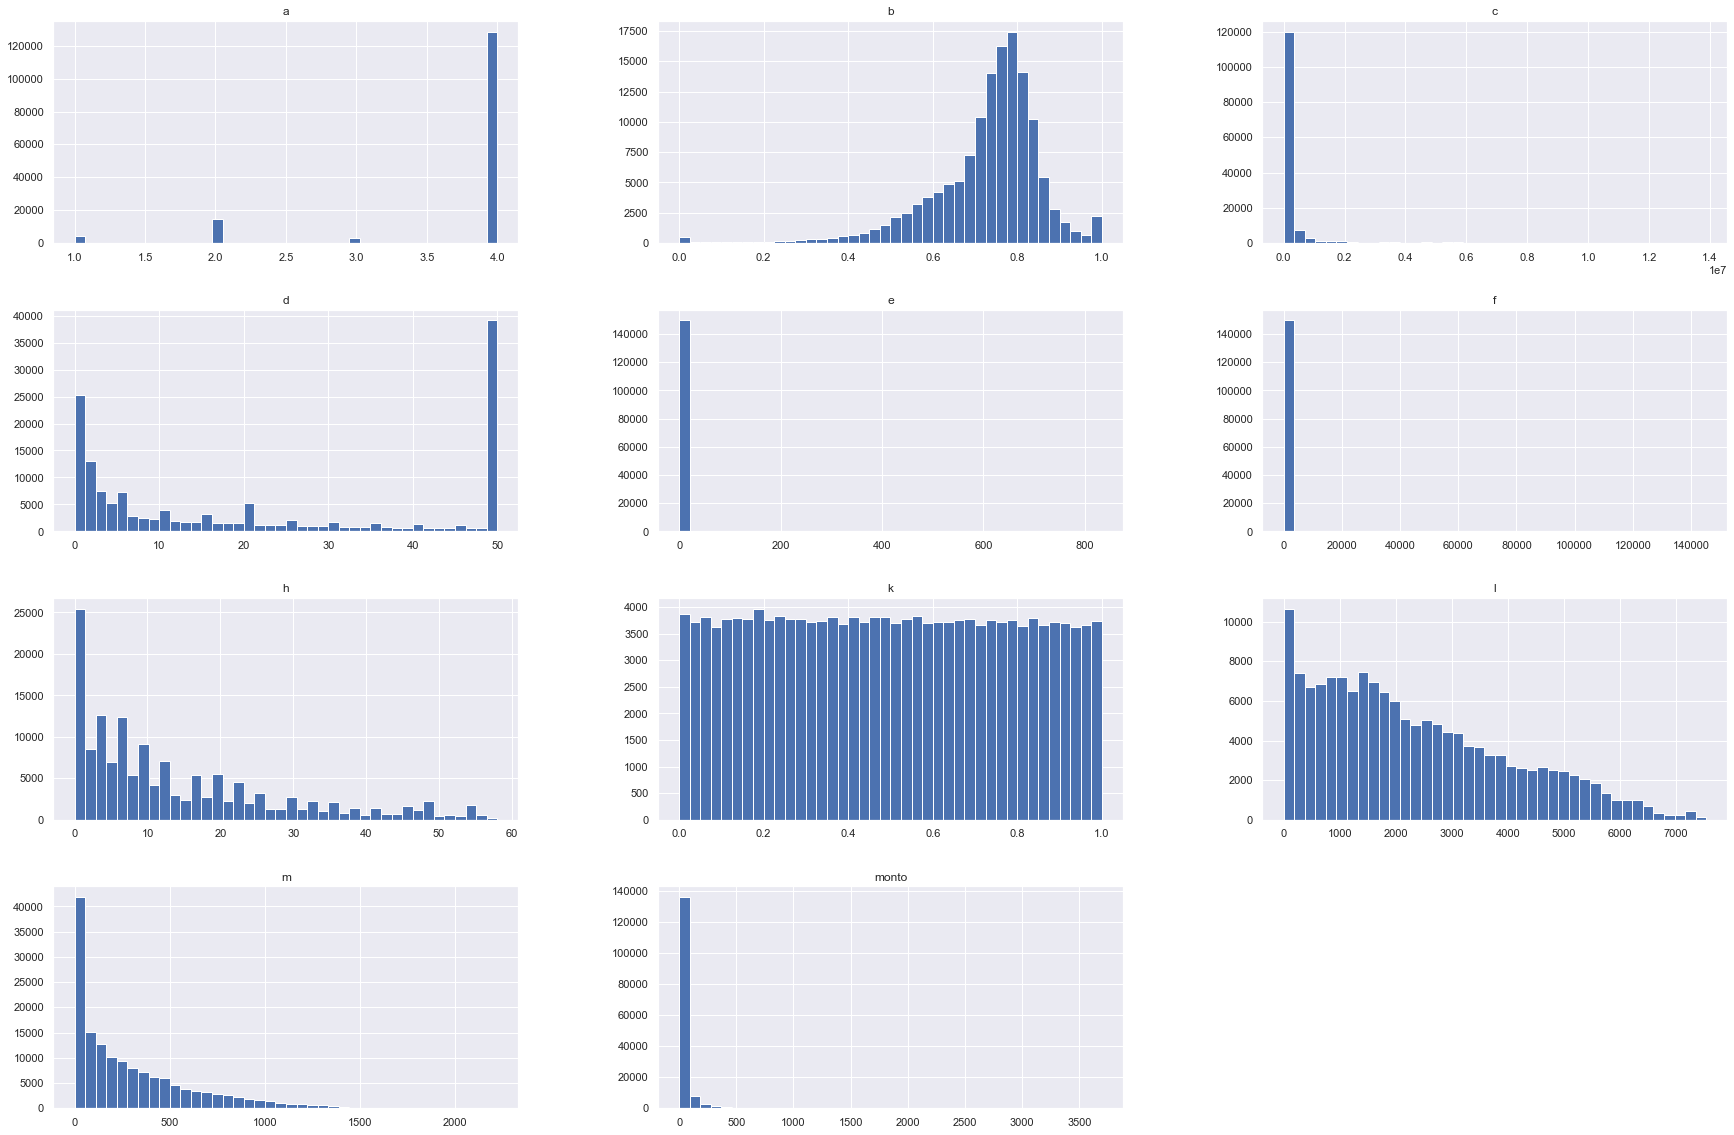

In [ ]:
df[numericas_all].hist(bins=40)

sns.set(rc={'figure.figsize':(30,20)})

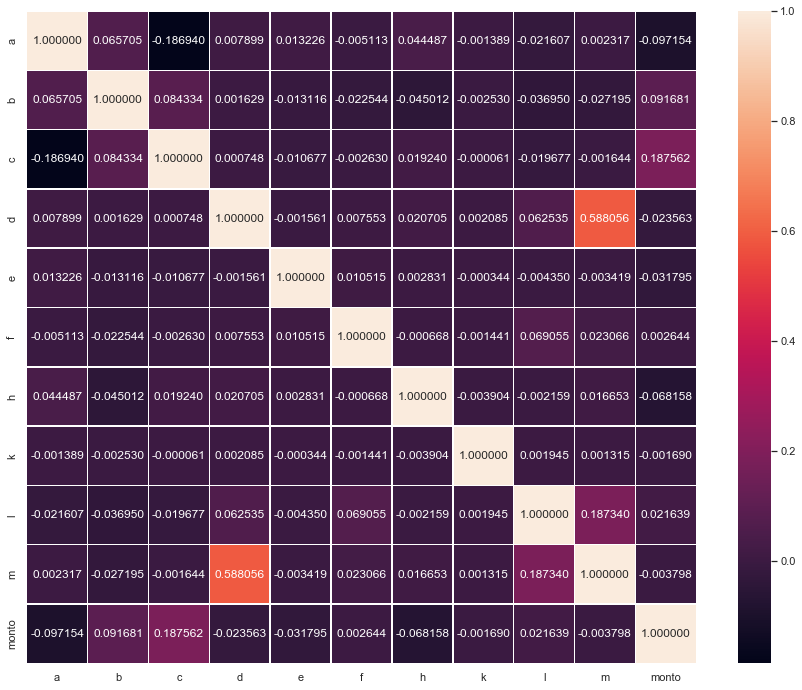

In [ ]:
cor_mat = df[numericas_all].corr()

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(cor_mat,linewidths=.5, ax=ax, annot=True, fmt="f")

**Distribuição**: As distribuição da maioria das features não segue uma normal e, em muitos casos, existe uma distribuição de cauda longa. Tais valores discrepantes em casos como fraude podem ser indicadores úteis uma vez que podem ser o grande indicativo de fraudadores.
Além disso, para quaisquer exclusão de outlier, é necessário conhecer muito bem as regras de negócio, ou seja, entender se de fato tais outliers representam erros de fato ou se fazem parte do processo. Dessa forma, como não tem-se tal informação, nenhum outlier será excluído.

**Correlação**: Na análise de correlação linear, as correlações mais fortes encontradas são "m" x "d", entretanto dado que não há informações sobre os dados e regras de negócio, tal correlação não é forte o suficiente para que seja removida uma das colunas.

## Target x Features

### Testes estatísticos para entendimento da diferença de distribuição e número de categorias nos grupos Fraude x Não Fraude 
#### Para as diferenças de distribuição, usaremos o teste não paramétrico mann-whitney U devido a distribuição não normal das feturas
#### Para o entendimento de percentual de distribuição de categorias, usaremos o teste chi2

Em ambos os casos, a confiança a ser considerada será 95% (alpha = 0.05)

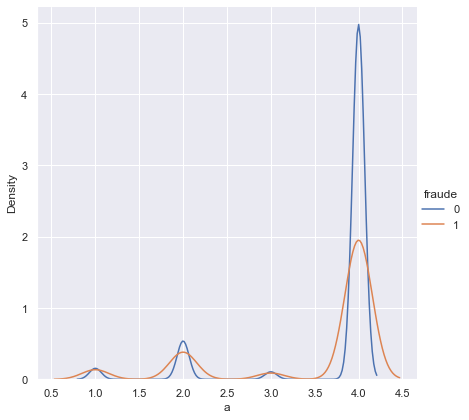

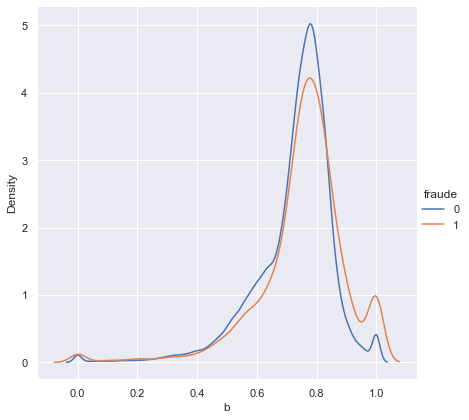

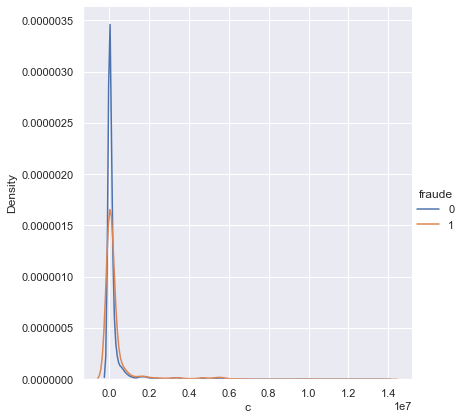

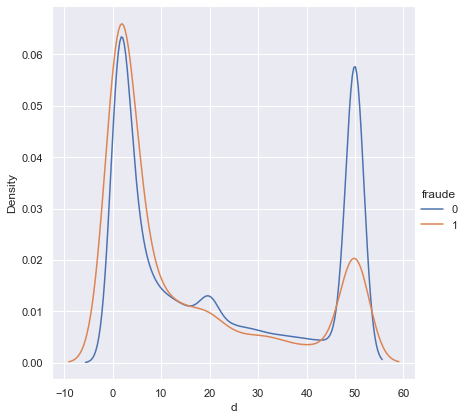

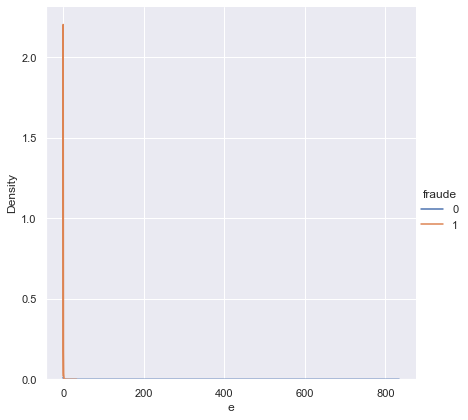

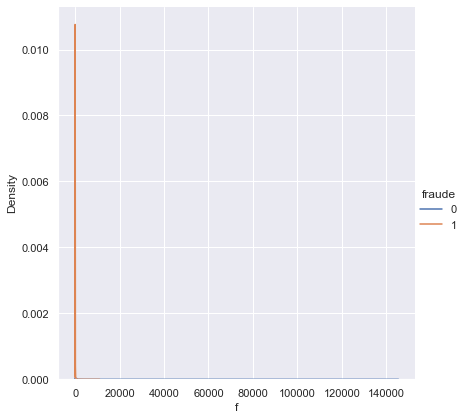

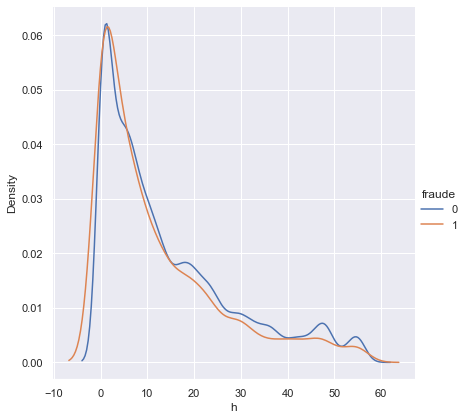

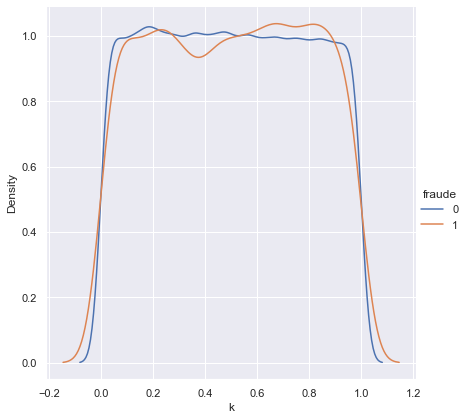

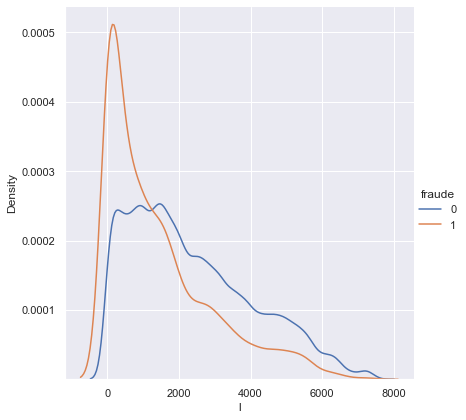

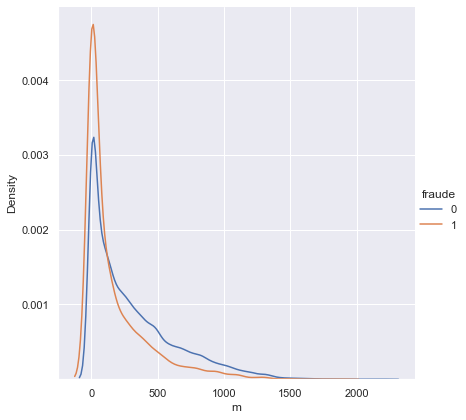

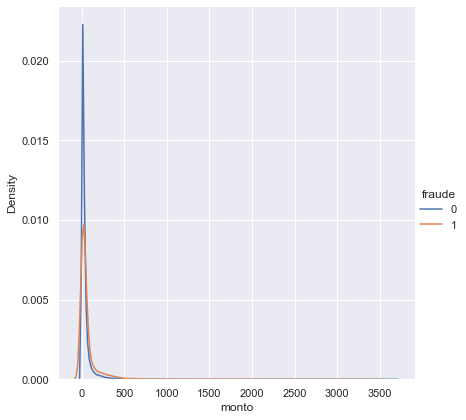

In [ ]:
for item in numericas_all:
    sns.FacetGrid(df, hue="fraude", height=6).map(sns.kdeplot, item).add_legend()
    plt.show()


In [ ]:
from scipy.stats import mannwhitneyu
import scipy.stats as stats

for item in numericas_all:
    count_not_fraude = df[(df.fraude == 0) & (df[item].notnull())].index.nunique() #conta quantas compras não foram fraudulentas
    count_fraude = df[(df.fraude == 1) & (df[item].notnull())].index.nunique() #conta quantas compras foram fraudulentas
    
    not_fraude =  df [df.fraude == 0][item]                                         
    fraude = df[df.fraude == 1][item]
    
    t, pvalue = stats.ks_2samp(not_fraude, fraude)
    alpha = 0.05
    print(item)
    print(pvalue)
    if pvalue > alpha: 
        print('rejeita hipotese nula - distribuições são iguais')
    else:
        print('aceita hipotese nula - distribuições são diferentes')  

a
3.75858114875942e-60
aceita hipotese nula - distribuições são diferentes
b
2.2318263103980255e-78
aceita hipotese nula - distribuições são diferentes
c
1.368664186352556e-27
aceita hipotese nula - distribuições são diferentes
d
4.455704073101976e-169
aceita hipotese nula - distribuições são diferentes
e
1.6195212332649346e-44
aceita hipotese nula - distribuições são diferentes
f
0.0
aceita hipotese nula - distribuições são diferentes
h
7.080637276262753e-46
aceita hipotese nula - distribuições são diferentes
k
0.24262926027797663
rejeita hipotese nula - distribuições são iguais
l
0.0
aceita hipotese nula - distribuições são diferentes
m
0.0
aceita hipotese nula - distribuições são diferentes
monto
5.1297061637086324e-61
aceita hipotese nula - distribuições são diferentes


De acordo com o teste de hipótese acima, todas as colunas são diferentes estatisticamente, exceto a coluna k. Esse fato já era esperado dado o próprio gráfico de densidade na coluna k, em que fraude e não fraude se mostram bastante similares.

In [ ]:
from scipy.stats import chi2_contingency

#criando nova feature: definindo se compra será nacional ou internacional
df['compra_nacional'] = np.where(df.g == 'BR', 1, 0)

#criando nova feature: segregar entre principais países e outros
maiores_paises =  ['BR','AR', 'UY', 'US']
df['grupo_paises'] = df["g"]
df.loc[~df["grupo_paises"].isin(maiores_paises), "grupo_paises"] = "paises_outros"

#criando nova feature: segregar entre principais categorias
produtos_categorias = df_item_fraude[1000:]
lista_categorias_outros = produtos_categorias.j.to_list()
df['grupo_categorias'] = df["j"]
df.loc[df["grupo_categorias"].isin(lista_categorias_outros), "grupo_categorias"] = "categorias_outros"

#removido "g", "j" devido a alta cardinalidade e "o" devido a quantidade de NaNs
novas_categorias = ['compra_nacional', 'grupo_categorias', 'grupo_paises', "n","p"]

df['id'] = df.index

for item in novas_categorias:
    
    contigency= df.pivot_table(index='fraude', columns=item, values='id', aggfunc=lambda x: len(x.unique())).fillna(0)
    c, pvalue, dof, expected = chi2_contingency(contigency)
    alpha = 0.05
    
    print(item)
    print(pvalue)
    
    if pvalue < alpha: 
        print('rejeita hipotese nula - grupos tem relação')
    else:
        print('aceita hipotese nula - grupos são independentes')  
           

compra_nacional
6.761272629879487e-56
rejeita hipotese nula - grupos tem relação
grupo_categorias
0.0
rejeita hipotese nula - grupos tem relação
grupo_paises
2.808441957543595e-63
rejeita hipotese nula - grupos tem relação
n
0.0
rejeita hipotese nula - grupos tem relação
p
0.0
rejeita hipotese nula - grupos tem relação


Em todos os casos acima, pvalue é menor que 0.05, o que indica que de fato há diferença entre os grupos de fraudadores e não fraudadores nessas features. 

## Balanceamento de classes

In [ ]:
df["fraude"].value_counts(normalize = True).map("{:.1%}".format)

0    95.0%
1     5.0%
Name: fraude, dtype: object

Dataset com target altamente desbalanceado. Iremos aplicar técnicas e modelos para que esse problema seja solucionado

# Modelagem

#### Considerações
1) A coluna monto refere-se ao valor da compra e está em uma única unidade (ex: Dólar)

2) Não há custo extra de fraude além do mencionado 

3) Nenhuma das colunas inseridas no modelo poderão causar data leakage - ou seja, todas esses dados são calculados/recebidos antes que o evento "Fraude" ocorra

In [ ]:
df_copy = df.copy()

In [ ]:

#função de split dataframe teste e treino
def split_df(df):
    df_model = df.copy().drop_duplicates()
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
    return df_model, df_train, df_test

#Criando Target Enconder para a coluna j usando cross validation para evitar colisões 
class KFoldTargetEncoder(base.BaseEstimator, base.TransformerMixin):

    def __init__(self, colnames,targetName,n_fold=5,verbosity=True,discardOriginal_col=False):

        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col

    def fit(self, X, y=None):
        return self


    def transform(self,X):

        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)

        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold, shuffle = False, random_state=2019)


        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan

        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())

        X[col_mean_name].fillna(mean_of_target, inplace = True)

        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
            

        return X

#gráfico que plota distribuicao do score
def test_score_distribution(df, fraude, probs) :

    dataframe = df.copy()
    dataframe['target_col'] = dataframe['fraude'] 
    dataframe['prediction_col'] = probs[:,1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    sns.distplot(dataframe.loc[lambda dataframe: dataframe['target_col'] == 0]['prediction_col'], ax=ax, color="b")
    sns.distplot(dataframe.loc[lambda dataframe: dataframe['target_col'] == 1]['prediction_col'], ax=ax, color="r")

    plt.title("Score distribution splitted by restrict or not")
    plt.xlabel("Score distribution")
    plt.ylabel("Count")
    plt.show()
 
#pipeline proposto para os modelos ensemble a serem estudados
def pipeline(categoricas_all,numericas_all, model):
    encoder = OneHotEncoder() #apenas para categoricas com baixa cardinalidade

    imputer_num = SimpleImputer(strategy = 'median')
    imputer_cat = SimpleImputer(strategy = 'most_frequent')
    
    numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))
    ])

    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent'))
    ,('encod', encoder)
    ])

    preprocessor = ColumnTransformer(
     transformers=[
    ('num', numeric_transformer, numericas_all)
    ,('cat', categorical_transformer, categoricas_all)
    ])
    
    pipe = Pipeline(steps=[('preprocessor', preprocessor)
                           ,('classifier', model)
                          ])
    return preprocessor, pipe

#função que calcula receita (monto * 0,1), perda em fraude (monto*0.1*10) e lucro (receita - perda em fraude)
def profit_from_decision(decision_df):
    return decision_df.assign(
     fraud_losses = lambda df_test: ((~df_test[blocked_col]) & (df_test[target_col])) * df_test[amount_col] * fraud_cost, #não bloqueia compra e deveria pois era fraude
     revenues = lambda df_test: ((~df_test[blocked_col]) & (~df_test[target_col])) * df_test[amount_col] * fee, #não bloqueia e não era fraude de fato
     profit = lambda df_test: df_test.revenues - (df_test.fraud_losses)
    )[["fraud_losses", "revenues", "profit"]].sum()


In [ ]:
#split train e test
df_model, df_train, df_test = split_df(df_copy)

#criando encoder usando Target Encoder para o grupo_categorias devido a alta cardinalidade
targetc = KFoldTargetEncoder('grupo_categorias','fraude',n_fold=5)
df_train = targetc.fit_transform(df_train)
df_test = targetc.transform(df_test)
df_model = targetc.transform(df_model)

#separando features numericas e categoricas
numericas_all = ["a", "b", "c", "d", "e","f", "h",  "l", "m", "monto", "grupo_categorias_Kfold_Target_Enc"] 
categoricas_all = ["compra_nacional", "n","p"] 
all_features = numericas_all + categoricas_all

#split treino e teste - feature x target
X_train = df_train[all_features]
y_train =df_train.fraude

X_test = df_test[all_features]
y_test = df_test.fraude

Como já existe um baseline, os modelos a serem testados serão ensembles fortes e usualmente usados para dados não lineares: XGBoost, BalancedBaggingClassifier, BalancedRandomForest

BalancedRandomForestClassifier(random_state=1234): 0.703033 (0.005503)


/Users/renata.biaggi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LGBMClassifier(class_weight='balanced', random_state=1234): 0.702638 (0.003616)


/Users/renata.biaggi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


BalancedBaggingClassifier(random_state=1234): 0.661172 (0.003934)


/Users/renata.biaggi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBClassifier(random_state=1234, scale_pos_weight=19): 0.700751 (0.006483)


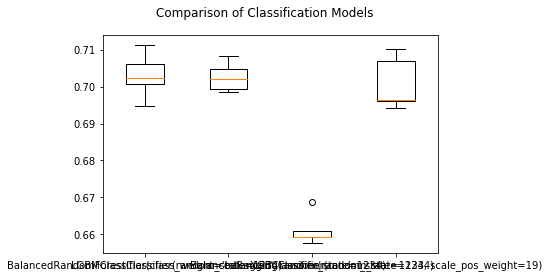

In [ ]:
#modelos a serem estudados
BBC = BalancedBaggingClassifier(random_state=1234)
BRC = BalancedRandomForestClassifier(random_state=1234)
XGB = XGBClassifier(scale_pos_weight=19,random_state=1234)
LGB = LGBMClassifier(class_weight = 'balanced', random_state=1234)

models = [BRC, LGB,BBC, XGB]
results = []
names = []

#Treino modelo
for item in models:
    processor, pipe = pipeline(categoricas_all,numericas_all, item)
    kfold = KFold(n_splits = 5, random_state = 42)
    cv_results = cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = 'balanced_accuracy')
    results.append(cv_results)
    name = item
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Plot comparação modelos
fig = plt.figure()
fig.suptitle('Comparison of Classification Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LGB, BRC e XGB produziram resultados muito semelhantes. Devido a mediana levemente maior, iremos fazer o tuning de hiperparâmetros no BRF

In [ ]:
#Tuning de hiperparàmetro BRC


preprocessor, pipe = pipeline(categoricas_all,numericas_all, BRC)

parameters = {'classifier__bootstrap': [True, False],
         'classifier__max_depth': [20, 30, 40, 50, 60, 70, 80, None],
         'classifier__max_features': ['auto', 'sqrt'],
         'classifier__min_samples_leaf': [1, 2, 4, 6],
         'classifier__min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(pipe, parameters, cv=4, n_jobs = -1, scoring = "roc_auc")
grid.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.772):
{'classifier__bootstrap': False, 'classifier__max_depth': 30, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}


/Users/renata.biaggi/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/renata.biaggi/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


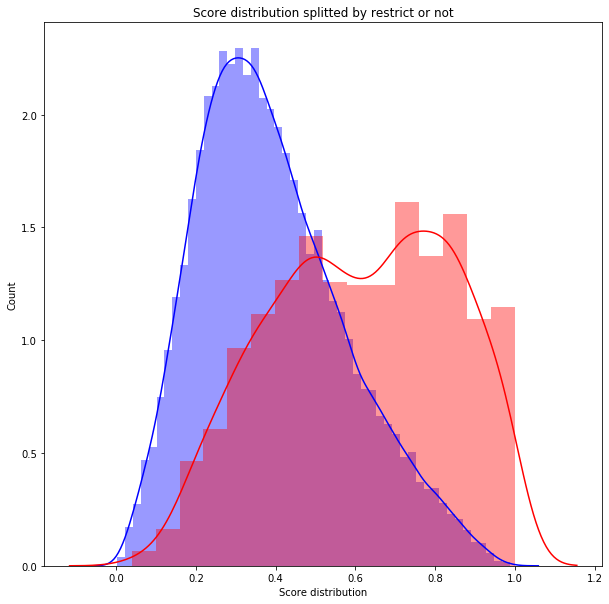

In [ ]:
model = grid.best_estimator_

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
probs_test = model.predict_proba(X_test)

dataframe = df_test.copy()
dataframe['target_col'] = dataframe['fraude'] 
dataframe['prediction_col'] = probs_test[:,1]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.distplot(dataframe.loc[lambda dataframe: dataframe['target_col'] == 0]['prediction_col'], ax=ax, color="b")
sns.distplot(dataframe.loc[lambda dataframe: dataframe['target_col'] == 1]['prediction_col'], ax=ax, color="r")

plt.title("Score distribution splitted by restrict or not")
plt.xlabel("Score distribution")
plt.ylabel("Count")
plt.show()

## Métricas de negócios

In [ ]:
#MODELO TREINADO
df_test['new_prediction_col'] = probs_test[:,1]*100
target_col = "fraude"
prediction_col = "new_prediction_col"
amount_col = "monto" 
blocked_col = "blocked"

possible_thresholds = np.arange(1, 100, 5)
all_decisions = []

for threshold in possible_thresholds: 
    all_decisions.append(profit_from_decision(df_test.assign(blocked=lambda df_test: df_test[prediction_col] >= threshold)))
    

threshold_evaluation = pd.concat(all_decisions, axis=1, keys=[s for s in possible_thresholds]).T.rename_axis("threshold").reset_index()
threshold_evaluation


/Users/renata.biaggi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,threshold,fraud_losses,revenues,profit
0,1,0.00,1.827,1.827
1,6,96.15,450.511,354.361
2,11,260.92,2295.646,2034.726
3,16,566.35,6506.081,5939.731
4,21,1410.90,12676.338,11265.438
5,26,2815.49,20807.524,17992.034
6,31,4683.44,30042.640,25359.200
7,36,7165.31,40941.764,33776.454
8,41,10839.28,51983.653,41144.373
9,46,15187.15,63019.986,47832.836


In [ ]:
best_decision_atual = threshold_evaluation.loc[lambda df: df["profit"].idxmax()]
best_decision_atual.reset_index().rename(columns = {11: 'valor $'})

,index,valor $
0,threshold,56.000
1,fraud_losses,24842.180
2,revenues,81854.883
3,profit,57012.703


O gráfico de distribuição do score para o modelo treinado mostra uma tendência de separação das curvas de fraudadores (vermelho) e não fraudadores (azul). Existe uma grande área de intersecção dos modelos que, em conjunto com as variáveis financeiras, podem ser de grande impacto para a empresa.

Com o modelo em questão, o maior lucro recebido é de 57.012, com threshold de 56.


# Modelo atual (score fornecido no dataset)

#### Usando apenas a porção de teste para que se possa comparar a mesma porção de dados no modelo atual x modelo treinado

## Distribuição do score 

/Users/renata.biaggi/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/renata.biaggi/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

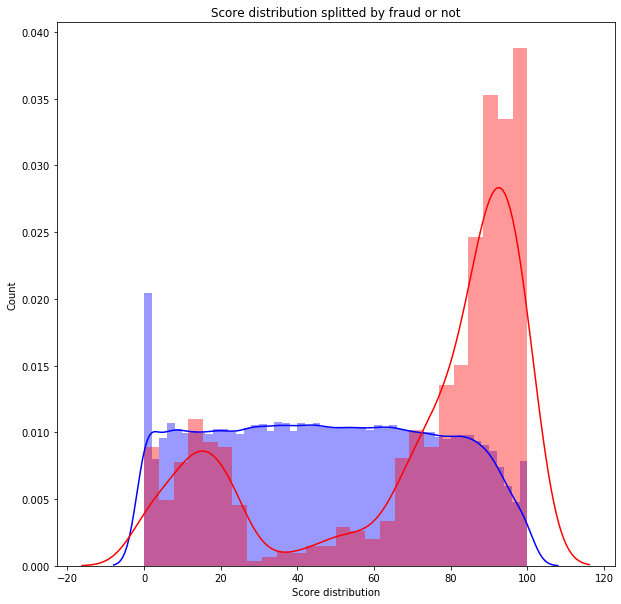

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.distplot(df.loc[lambda df: df.fraude == 0]['score'], ax=ax, color="b")
sns.distplot(df.loc[lambda df: df.fraude == 1]['score'], ax=ax, color="r")

plt.title("Score distribution splitted by fraud or not")
plt.xlabel("Score distribution")
plt.ylabel("Count")

O gráfico acima ressalta que o score para o grupo não fraudador (azul) está bastante disperso, ou seja, o modelo pode não estar reconhecendo muito bem o padrão para essa classe. Para a classe de fraudadores, para determinadas transações o modelo de fato encontrou scores maiores, porém existe um comportamento bimodal do modelo em relação a essa classe, ou seja, alguns possíveis fraudadores também recebem scores bastante baixos.

In [ ]:
#Cálculo da área embaixo da curva ROC
fpr, tpr, thresholds = roc_curve(df['fraude'], df['score'])
print("ROC AUC: ", auc(fpr, tpr))

ROC AUC:  0.726275487251462


In [ ]:
#MODELO ATUAL
target_col = "fraude"
prediction_col = "score"
amount_col = "monto" #assumindo que essa coluna já está em uma mesma unidade (ex: Dólar) e que corresponde ao valor da compra
blocked_col = "blocked"

possible_thresholds = np.arange(1, 100, 5)
all_decisions = []

for threshold in possible_thresholds: 
    all_decisions.append(profit_from_decision(df_test.assign(blocked=lambda df_test: df_test[prediction_col] >= threshold)))
    

threshold_evaluation = pd.concat(all_decisions, axis=1, keys=[s for s in possible_thresholds]).T.rename_axis("threshold").reset_index()

threshold_evaluation

,threshold,fraud_losses,revenues,profit
0,1,1181.23,3242.109,2060.879
1,6,2894.78,7780.255,4885.475
2,11,5703.85,13614.191,7910.341
3,16,8124.90,18792.864,10667.964
4,21,10295.67,24173.316,13877.646
5,26,12232.14,28869.261,16637.121
6,31,13219.83,34128.165,20908.335
7,36,13403.58,39126.943,25723.363
8,41,13620.49,44401.097,30780.607
9,46,14114.76,50229.961,36115.201


In [ ]:
best_decision_anterior = threshold_evaluation.loc[lambda df: df["profit"].idxmax()]
best_decision_anterior.reset_index().rename(columns = {11: 'valor $'})

,index,15
0,threshold,76.000
1,fraud_losses,30138.660
2,revenues,85075.225
3,profit,54936.565


# Comparando modelo atual (score) com modelo treinado

Em relação as métricas de modelagem:

AUC modelo atual = 0.72 ---- AUC modelo treinado = 0.77

Aumento de aproximadamente 7%

Outras métricas de modelagem poderiam ser calculadas como precision, recall e f1 score, porém o que de fato é interessante em um modelo de fraude é o entendimento de como o modelo pode impactar diretamente no negócio. Dessa forma, vamos comparar a diferença entre os lucros dos modelos em 1 mês de dados

In [ ]:
df.monto.mean()

43.52313413333399

### Diferença em lucro

Na base de test, o lucro calculado para o modelo atual foi de 54.936 e com o modelo treinado 57.012 - representado uma diferença de aproximadamente 3.7%.

#### Modelo Atual
threshold -- 76.000

fraud_losses -- 30138.660

revenues -- 85075.225

profit -- 54936.565

profit/revenues = 64,5%

#### Modelo Treinado
threshold -- 56.000

fraud_losses -- 24842.180

revenues -- 81854.883

profit -- 57012.703

profit/revenues = 69,6%

### Valuation do modelo treinado
Considerando fez 15,1 M de pagamentos em 1 trimestre e considerando que o valor médio de transação é de 43,5, a receita em 1 mês será:
15,1 * 43,5 / 3 = 216,4 M

Para o modelo anterior, o lucro seria de 64,5% * 216,4 M = 139,5 M/mês

Para o modelo treinado, o novo lucro será 150,6 M/mês

Portanto, a aplicação do modelo poderia trazer um lucro extra de 11,1 M/mês
